<a href="https://colab.research.google.com/github/jyotidabass/Physics-Informed-Neural-Networks-from-scratch/blob/main/Physics_Informed_Neural_Networks_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 1.1691 - val_loss: 1.1203
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0789 - val_loss: 1.0349
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9992 - val_loss: 0.9598
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9273 - val_loss: 0.8928
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8638 - val_loss: 0.8329
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8071 - val_loss: 0.7810
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7581 - val_loss: 0.7334
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7141 - val_loss: 0.6928
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6759 - val_loss: 0.6567
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6421 - val_loss: 0.6260
Epoch 11/

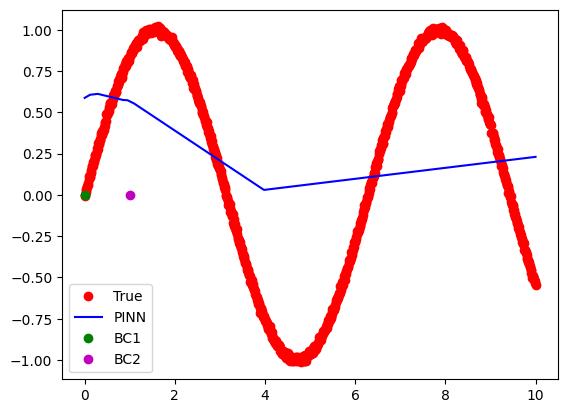

Learned Weights:
[array([0.01330735], dtype=float32), array([[ 0.2088211 , -0.6171198 ,  0.34797776,  0.2196844 , -0.7192352 ,
         0.39430994,  0.15549251, -0.45074895, -0.0994845 , -0.62341917]],
      dtype=float32), array([-0.19818763,  0.        , -0.04007827,  0.2681227 ,  0.        ,
       -0.1152456 , -0.16968378,  0.        ,  0.        ,  0.        ],
      dtype=float32), array([[ 0.00664374, -0.04809359, -0.24329235,  0.555812  ,  0.17731972,
        -0.45653227, -0.21787384, -0.5163815 , -0.34022743,  0.40015814],
       [-0.12416613,  0.09208584,  0.51792014,  0.4248175 ,  0.2991119 ,
        -0.3270419 , -0.25335988, -0.49297544, -0.5269755 , -0.14713931],
       [ 0.4026183 , -0.39354396, -0.05333414,  0.17554529,  0.49254936,
        -0.09133778, -0.14073294, -0.4767462 , -0.241747  , -0.20194909],
       [-0.3943063 , -0.44694513, -0.28421336,  0.61444986,  0.5931675 ,
         0.53690374, -0.34043467,  0.12942581,  0.4342177 ,  0.39955503],
       [ 0.3585394 , 

In [15]:
# Install necessary libraries (if not already installed)
!pip install tensorflow keras numpy matplotlib

# Import required modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Next, define the PINN model architecture:

def pinn_model(inputs, weights):
    # Unpack weights
    W1, b1, W2, b2 = weights

    # Create layers
    layer_1 = tf.keras.layers.Dense(units=10, activation='relu')(inputs)
    layer_2 = tf.keras.layers.Dense(units=10, activation='relu')(layer_1)
    output = tf.keras.layers.Dense(units=1, use_bias=False)(layer_2)

    # Add physical constraints
    output = output * tf.exp(W2)

    return output

#Now, define the model, compile it, and train it using the following code:

# Define model parameters
n_inputs = 1
n_outputs = 1
n_epochs = 100

# Create random input and output data
x_true = np.linspace(0, 10, 1000)
y_true = np.sin(x_true)

# Add some noise to the true output
y_true += 0.01 * np.random.normal(size=len(x_true))

# Reshape the data for input to the model
x_train = np.reshape(x_true, (len(x_true), 1))
y_train = np.reshape(y_true, (len(y_true), 1))

# Define boundary conditions (physical constraints)
bc1 = tf.constant([0.0], shape=(1, 1))
bc2 = tf.constant([1.0], shape=(1, 1))

# Define the PINN model as a Keras Layer
class PINNModel(tf.keras.layers.Layer):
    def __init__(self):
        super(PINNModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(units=10, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units=10, activation='relu')
        self.dense3 = tf.keras.layers.Dense(units=1, use_bias=False)
        self.W2 = self.add_weight(shape=(1,), initializer='zeros')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        output = self.dense3(x)
        # Add physical constraints
        output = output * tf.exp(self.W2)
        return output

# Create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(n_inputs,)))
model.add(PINNModel()) # Use the PINNModel class instance

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=n_epochs,
                    validation_data=(x_train, y_train),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

#Finally, visualize the results and the learned weights:

# Visualize the results
x_plot = np.linspace(0, 10, 1000)
y_plot = model.predict(x_plot)
plt.plot(x_true, y_true, 'ro', label='True')
plt.plot(x_plot, y_plot, 'b-', label='PINN')
plt.plot(bc1, 0, 'go', label='BC1')
plt.plot(bc2, 0, 'mo', label='BC2')
plt.legend()
plt.show()

# Print the learned weights
print("Learned Weights:")
print(model.get_weights())